In [2]:
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, precision_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix


In [32]:
df=pd.read_csv('../../trends_data/normal_trends.csv')
ticks = pd.read_csv('../../trends_data/pureSBER19.csv')
df.head(3)

direction  trend_start  trend_end  importance         k             b  \
0          2         5889      14843   14.998582  0.022668  18798.264571   
1          2         7853      13940   17.915880  0.023609  18826.623905   
2          2        15242      18545   16.103465  0.015199  18893.317626   

                       line_touching_x  dispersion  trend_lenght  \
0    [5889, 6309, 14518, 14585, 14842]    2985.375          8954   
1   [7853, 12770, 13436, 13586, 13936]    1698.125          6087   
2  [15242, 15360, 15525, 18396, 18538]    1023.500          3303   

   r_squared_of_trend     ...      \
0            1.056566     ...       
1            0.838180     ...       
2            0.143231     ...       

                                         tops_height  \
0  [26.8805700989069, 26.8805700989069, 79.279477...   
1  [81.37787563119491, 81.37787563119491, 38.5756...   
2  [18.143618002155563, 18.143618002155563, 11.59...   

                         tops_width  \
0    [420, 420, 8209, 67, 257, 257]   
1  [4917, 4917, 666, 150, 350, 350]   
2   [118, 118, 165, 2871, 142, 142]   

                                       tops_HW_ratio tops_count  \
0  [0.06400135737834976, 0.06400135737834976, 0.0...          6   
1  [0.016550310276834432, 0.016550310276834432, 0...          6   
2  [0.15375947459453868, 0.15375947459453868, 0.0...          6   

                                   peaks_coordinates  \
0  [(5889, 18932.0), (6309, 18941.0), (14518, 191...   
1  [(7853, 19012.0), (12770, 19128.0), (13436, 19...   
2  [(15242, 19125.0), (15360, 19127.0), (15525, 1...   

                                        peaks_height  \
0  [28.0, 29.7904642409012, 12.808257522745407, 1...   
1  [146.0, 44.63758389261784, 20.0268817204269, 1...   
2  [19.0, 15.571428571427532, 12.812208562951128,...   

                   peaks_width  \
0  [480, 7173, 1429, 200, 348]   
1  [7653, 2533, 372, 366, 426]   
2   [176, 168, 2359, 640, 213]   

                                      peaks_HW_ratio peaks_count  height_pic  
0  [0.058333333333333334, 0.004153138748208727, 0...           5       264.0  
1  [0.01907748595322096, 0.01762241764414443, 0.0...           5       264.0  
2  [0.10795454545454546, 0.09268707482992579, 0.0...           5       304.0  

[3 rows x 21 columns]

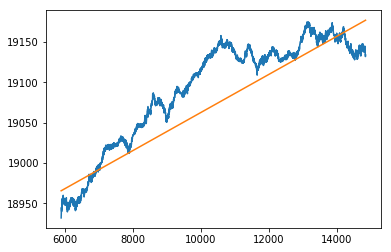

In [41]:
partial = ticks[5889:14843].copy()
#partial['trend'] = partial.index*0.022668+18798.264571
partial['trend'] = partial.index*0.023609+18826.623905

plt.plot(partial[' <PRICE>'])
#plt.plot(partial['trend'])
plt.plot(partial['trend'])
plt.show()

In [44]:
partial[[' <PRICE>', 'trend']].head()

<PRICE>         trend
5889   18932.0  18965.657306
5890   18934.0  18965.680915
5891   18936.0  18965.704524
5892   18936.0  18965.728133
5893   18937.0  18965.751742

In [21]:
df.iloc[0,1:]['trend_start']

5889

In [37]:
def plot_trend(df, ticks=ticks):
    start = df['trend_start']
    end = df['trend_end']
    k = df['k']
    b = df['b']
    plt.plot(ticks[start:end][' <PRICE>'])
    partial['trend'] = partial.index*k+b
    plt.show()

In [ ]:
def plot_trend(df, ticks=ticks):
    """
    get a dataframe discribing a trend with ticks
    
    :param df: a single row of trend dataframe
    :param ticks: corresponding dataset of ticks
    :returns: 
    """
    start = df['trend_start']
    end = df['trend_end']
    k = df['k']
    b = df['b']
    plt.plot(ticks[start:end][' <PRICE>'])
    partial['trend'] = partial.index*k+b
    return partial

In [11]:
from sklearn.decomposition import PCA

pca = PCA(n_components=4)

principalComponents = pca.fit_transform(x)

principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2', 'principal component 3', 'principal component 4'])

In [12]:
finalDf = pd.concat([principalDf, df[['trend_class']]], axis = 1)

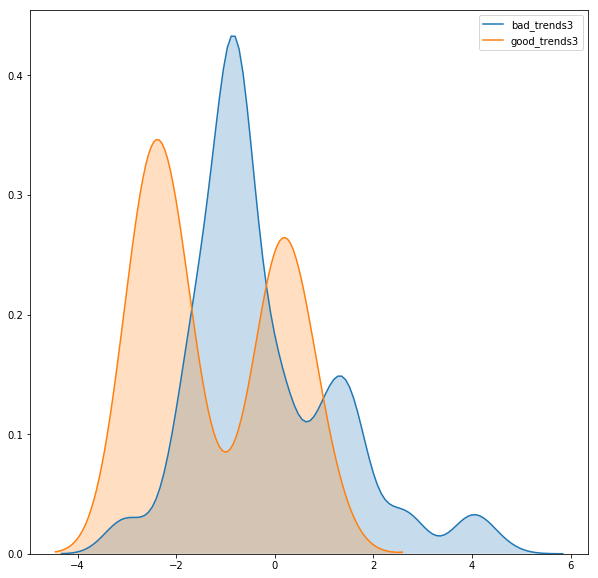

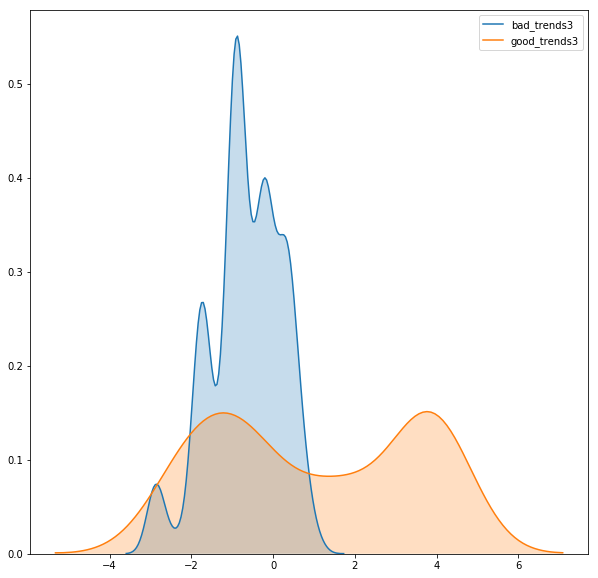

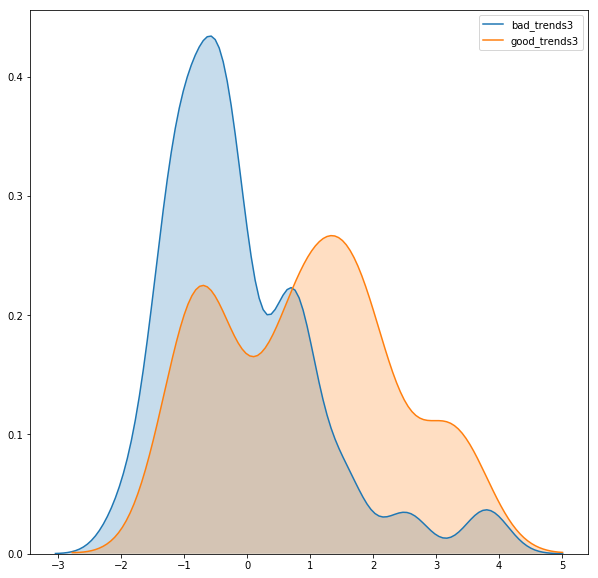

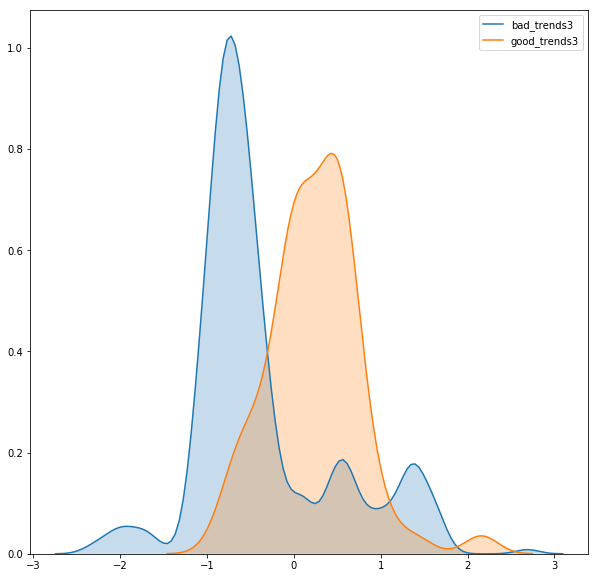

In [13]:
featurelist=principalDf.columns.tolist()
plt.rcParams["figure.figsize"] = [10,10]
type1DF=finalDf.loc[finalDf['trend_class'] == 'bad_trends3']
type2DF=finalDf.loc[finalDf['trend_class'] == 'good_trends3']
type3DF=finalDf.loc[finalDf['trend_class'] == 'good_trends2']
type4DF=finalDf.loc[finalDf['trend_class'] == 'bad_trends2']
for feature in featurelist:
    var1=type1DF[feature]
    var2=type2DF[feature]
    var3=type3DF[feature]
    var4=type4DF[feature]
    sns.kdeplot(var1, shade=True, label='bad_trends3')
    sns.kdeplot(var2, shade=True, label='good_trends3')
    #sns.kdeplot(var4, shade=True, label='bad_trends2')
    #sns.kdeplot(var3, shade=True, label='good_trends2')
    plt.show()

In [14]:
flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]
sns.palplot(sns.color_palette(flatui))

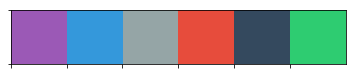

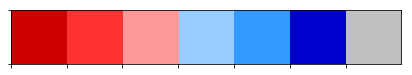

In [15]:
flatui = ["#cc0000", "#ff3333", "#ff9999", "#99ccff", "#3399ff", "#0000cc", "#c0c0c0"]
sns.palplot(sns.color_palette(flatui))
plt.show()

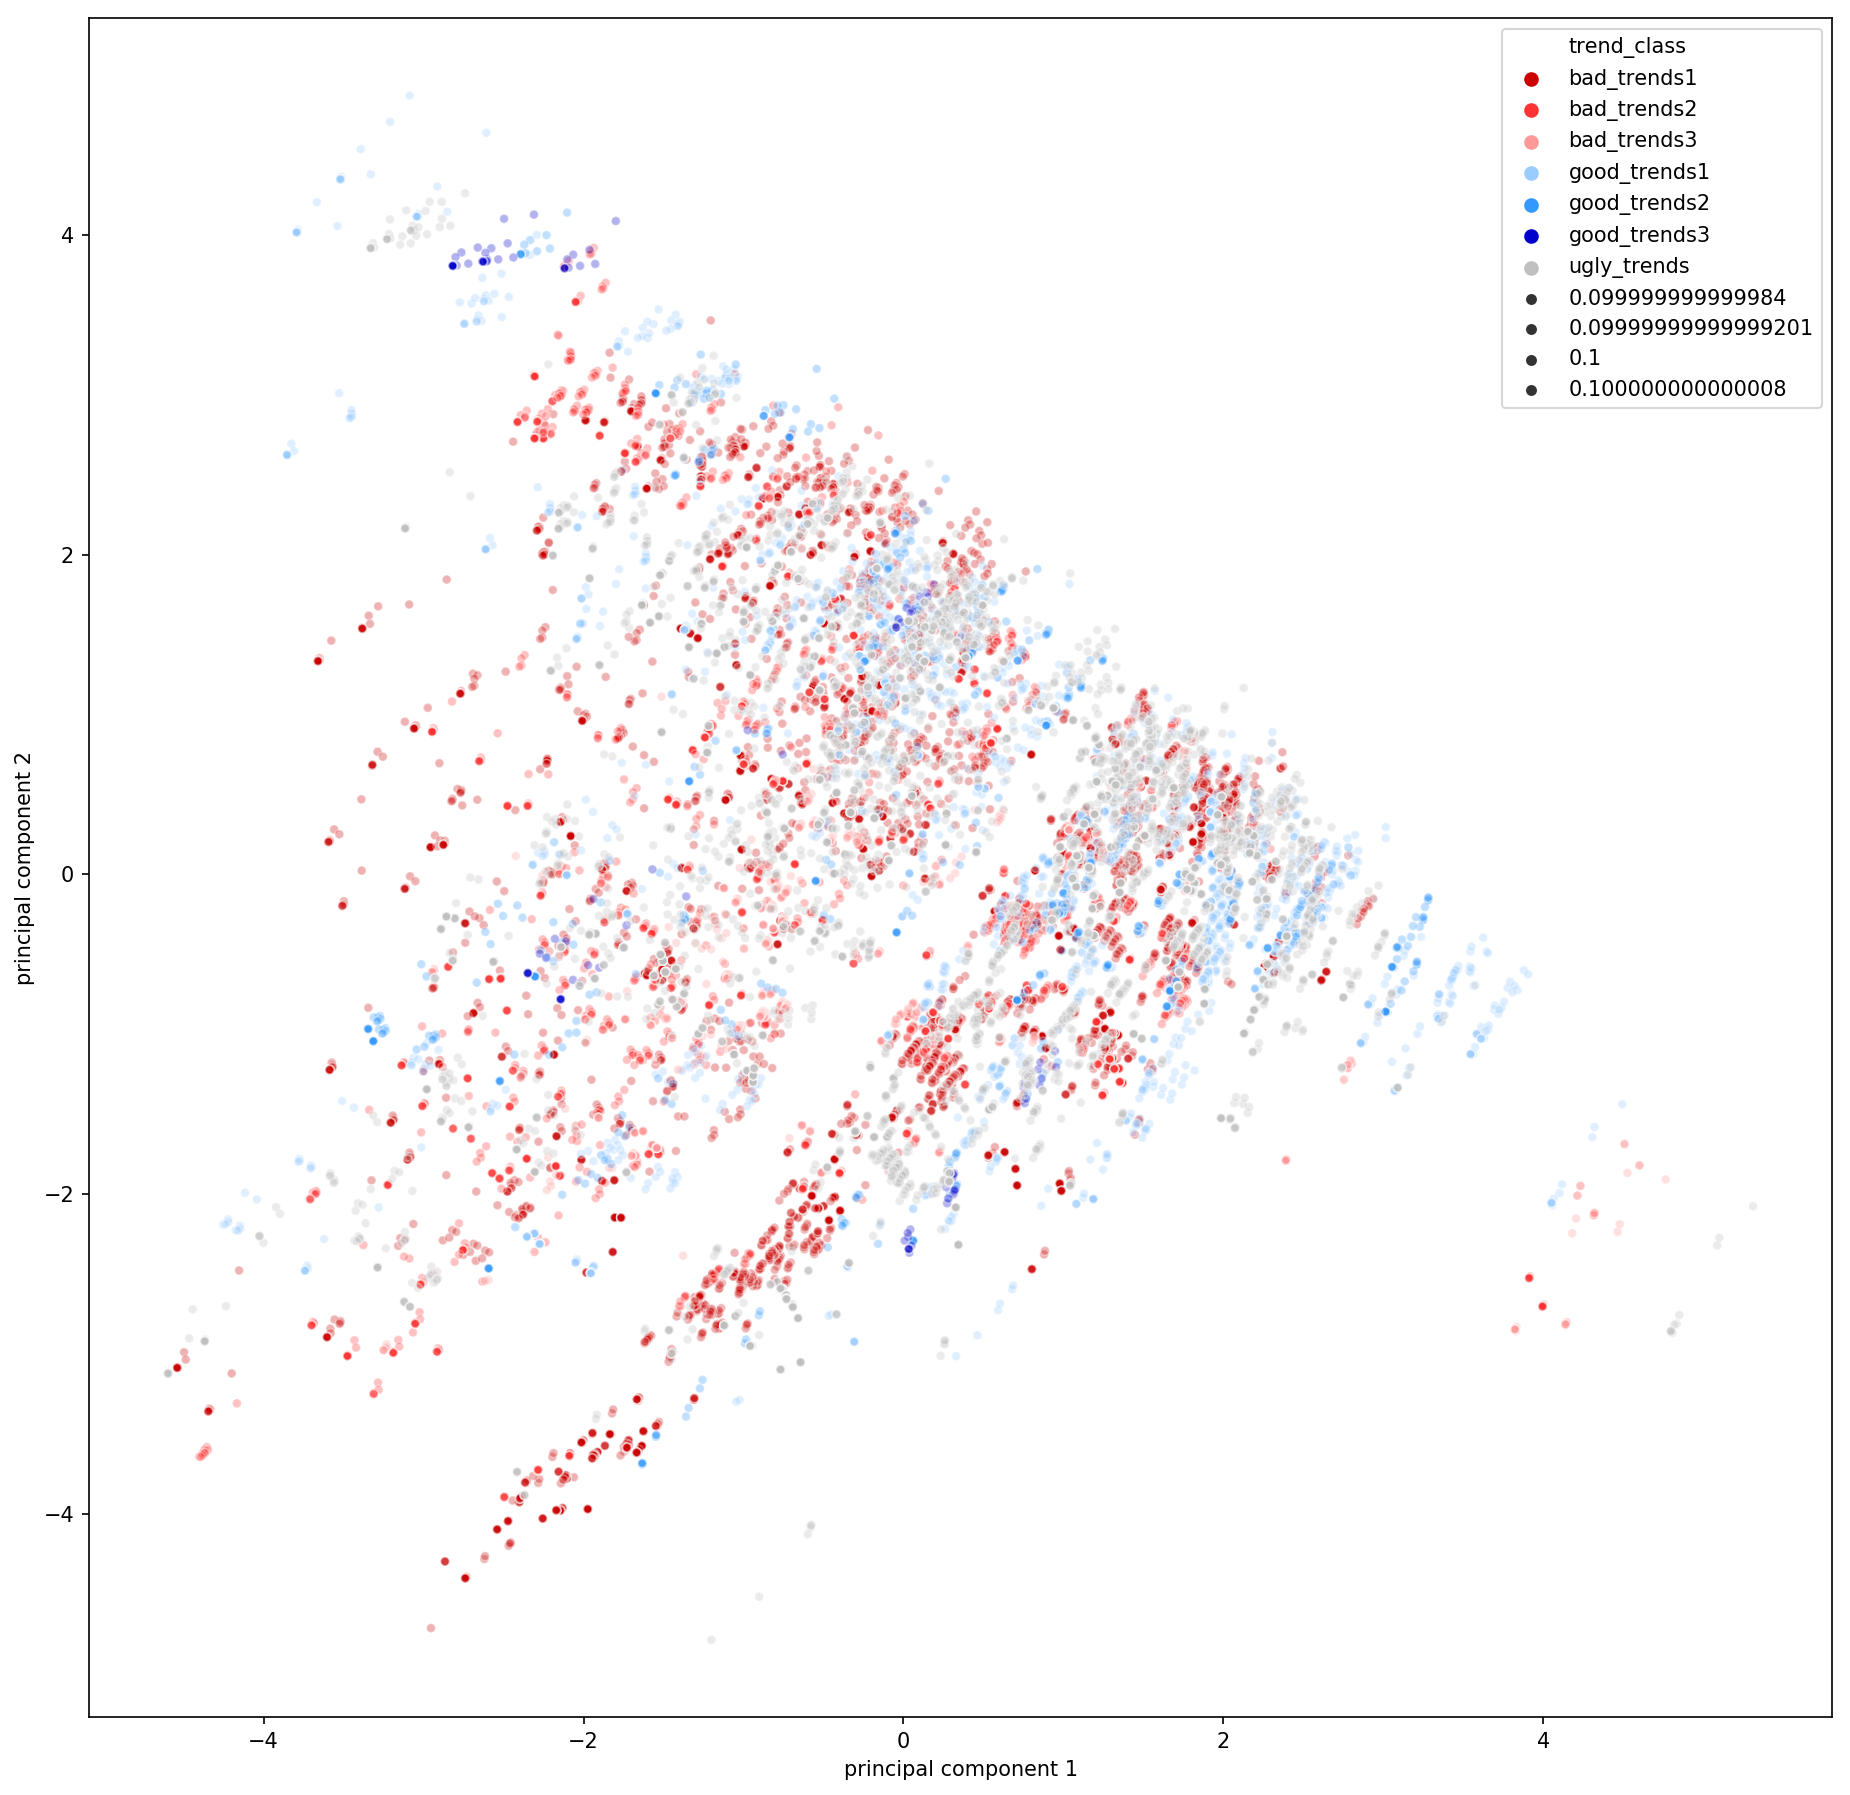

In [16]:
plt.figure(num=None, figsize=(15, 15), dpi=150)
sns.scatterplot(y='principal component 2', x='principal component 1', hue='trend_class', palette=sns.color_palette(flatui), size=0.1, alpha=0.3, data=finalDf)
plt.show()

In [17]:
mapping = {'bad_trends3': 1, 'bad_trends2': 2, 'bad_trends1':3, 'bad_trends3':4, 'good_trends1':5, 'good_trends2':6, 'good_trends3':7, 'ugly_trends':0}
df=df.replace({'trend_class': mapping})

In [22]:
X_train, X_test, y_train, y_test = train_test_split(principalDf, df[['trend_class']], test_size=0.2, random_state=42)

names = ["Nearest Neighbors",
         "Decision Tree", "Neural Net",
         "Naive Bayes", "OneVsRestClassifier", 'OneVsRestClassifierLogisticRegression', "LinearSVC" ]
classifiers = [
    KNeighborsClassifier(),
    DecisionTreeClassifier(),
    MLPClassifier(hidden_layer_sizes=(10000), activation='relu', 
                  solver='adam', alpha=0.001, batch_size='auto', 
                  learning_rate='adaptive', learning_rate_init=0.001, power_t=0.5, max_iter=1000),
    # hidden_layer_sizes=(10000) alpha=0.001 learning_rate_init=0.001 max_iter=2000 for 71
#   GaussianNB(), 
    OneVsRestClassifier(DecisionTreeClassifier()), 
    OneVsRestClassifier(MLPClassifier()),
    LinearSVC()]

for name, clf in zip(names, classifiers):
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    y_pred = clf.predict(X_test)   
    print(name)
    print(score)
    print("f1_score: " + str(f1_score(y_test, y_pred, average="macro")))
    print("precision_score: " + str(precision_score(y_test, y_pred, average="macro")))
    print("recall_score: " + str(recall_score(y_test, y_pred, average="macro")))  

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:912: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Nearest Neighbors
0.8979893554109994
f1_score: 0.8896712091733481
precision_score: 0.896940750767989
recall_score: 0.883901886688195
Decision Tree
0.8985807214665879
f1_score: 0.9094154199224738
precision_score: 0.9075069299424411
recall_score: 0.9115167629445521
Neural Net
0.6836191602602011
f1_score: 0.687399784162056
precision_score: 0.7521663894588564
recall_score: 0.6578003556884354
Naive Bayes
0.8560023654642224
f1_score: 0.7678351843655101
precision_score: 0.7783567836874317
recall_score: 0.8621463755560766
OneVsRestClassifier
0.5706682436428149
f1_score: 0.5292575013133558
precision_score: 0.6490620704701462
recall_score: 0.5026666006058195


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


OneVsRestClassifierLogisticRegression
0.33737433471318745
f1_score: 0.11883937509852373
precision_score: 0.09641045649629341
recall_score: 0.1579039109789115


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [25]:
X_train, X_test, y_train, y_test = train_test_split(principalDf, df[['trend_class']], test_size=0.2, random_state=42)

names = ["Neural",
         "Neural", "Neural Net",
         "Neural", "Neural", 'Neural', "Neural" ]
classifiers = [
    MLPClassifier(hidden_layer_sizes=(5000), activation='relu', 
                  solver='adam', alpha=0.001, batch_size='auto', 
                  learning_rate='adaptive', learning_rate_init=0.001, power_t=0.5, max_iter=6000),
    MLPClassifier(hidden_layer_sizes=(10000), activation='relu', 
                  solver='adam', alpha=0.001, batch_size='auto', 
                  learning_rate='adaptive', learning_rate_init=0.001, power_t=0.5, max_iter=3000),
    MLPClassifier(hidden_layer_sizes=(20000), activation='relu', 
                  solver='adam', alpha=0.001, batch_size='auto', 
                  learning_rate='adaptive', learning_rate_init=0.001, power_t=0.5, max_iter=5000),
    MLPClassifier(hidden_layer_sizes=( ми), activation='relu', 
                  solver='adam', alpha=0.001, batch_size='auto', 
                  learning_rate='adaptive', learning_rate_init=0.01, power_t=0.5, max_iter=10000), 
    MLPClassifier(hidden_layer_sizes=(2000), activation='relu', 
                  solver='adam', alpha=0.001, batch_size='auto', 
                  learning_rate='adaptive', learning_rate_init=0.001, power_t=0.5, max_iter=1000), 
    MLPClassifier(hidden_layer_sizes=(10000), activation='relu', 
                  solver='adam', alpha=0.0001, batch_size='auto', 
                  learning_rate='adaptive', learning_rate_init=0.001, power_t=0.5, max_iter=3000),
    MLPClassifier(hidden_layer_sizes=(10000), activation='relu', 
                  solver='adam', alpha=0.00001, batch_size='auto', 
                  learning_rate='adaptive', learning_rate_init=0.001, power_t=0.5, max_iter=3000)
]

for name, clf in zip(names, classifiers):
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    y_pred = clf.predict(X_test)   
    print(name)
    print(score)
    print("f1_score: " + str(f1_score(y_test, y_pred, average="macro")))
    print("precision_score: " + str(precision_score(y_test, y_pred, average="macro")))
    print("recall_score: " + str(recall_score(y_test, y_pred, average="macro")))  

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:912: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Neural
0.663217031342401
f1_score: 0.6427553554854754
precision_score: 0.7281134326136368
recall_score: 0.6396019762756584


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:912: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Neural
0.6354228267297457
f1_score: 0.6421223138609335
precision_score: 0.6507849524431444
recall_score: 0.6485592031411588


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:912: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Neural Net
0.6995860437610881
f1_score: 0.7059291061923133
precision_score: 0.7059359677413812
recall_score: 0.7195024381076359


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:912: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Neural
0.676227084565346
f1_score: 0.6836988834205091
precision_score: 0.6914168470055791
recall_score: 0.6849173595096938


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:912: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Neural
0.6898285038438794
f1_score: 0.6955741959047353
precision_score: 0.7011789918180314
recall_score: 0.7021142993914858


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:912: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Neural
0.7123004139562389
f1_score: 0.7084073062028929
precision_score: 0.7272293046971224
recall_score: 0.7195623819613205


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:912: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Neural
0.6969248965109403
f1_score: 0.701096037224244
precision_score: 0.7348788681084321
recall_score: 0.6981664377283191


In [19]:
X_train, X_test, y_train, y_test = train_test_split(principalDf, df[['trend_class']], test_size=0.2, random_state=58)

names = ["Nearest Neighbors",
         "Decision Tree"]
classifiers = [
    KNeighborsClassifier(),
    DecisionTreeClassifier(),
    ]

for name, clf in zip(names, classifiers):
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    y_pred = clf.predict(X_test)
    print(name)
    print(score)
    print("f1_score: " + str(f1_score(y_test, y_pred, average="macro")))
    print("precision_score: " + str(precision_score(y_test, y_pred, average="macro")))
    print("recall_score: " + str(recall_score(y_test, y_pred, average="macro")))  

Nearest Neighbors
0.9036073329390893
f1_score: 0.8848104656484322
precision_score: 0.9037172530919813
recall_score: 0.870007564565502
Decision Tree
0.8982850384387936
f1_score: 0.8932817160306897
precision_score: 0.891838048224343
recall_score: 0.8949954130102908


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()


In [20]:
X_train, X_test, y_train, y_test = train_test_split(df.loc[:, features], df[['trend_class']], test_size=0.2, random_state=58)
X_test

absolute_trend_lenght           b  importance  coordinates_X_d  \
974              9863.000018  221.796236   36.534462             9575   
15806            8857.000268  137.610857   32.974295             1926   
14641            5214.000025  202.466181   31.913145             5214   
12931            8193.000033  236.970528   28.630836              161   
11485            6860.000236  131.182467   29.166668             6783   
16809           34807.000255  175.583494   26.432988            31453   
10223           15119.000146  267.102047   42.741620              264   
12556           18850.000007  224.123626   50.120019              331   
12290            9533.000021  221.172345   52.638215             9513   
8360            16216.000037  248.221990   25.822961             -142   
10942           10923.000019  233.646334   30.752844              800   
16510            6371.000001  231.174706   33.222116              473   
13568           18888.000002  228.209686   89.074477             3371   
1419            10259.000280  197.320674   19.113300                0   
10456            7479.000224  311.745329   42.117416              307   
15627           13622.000056  251.632053   34.092881            13645   
2799            33653.000023  232.297941   24.639291             6517   
531              6717.000418  249.444718   23.201540              925   
12951           15132.000096  239.670622   20.098287            11327   
10598           11956.000398  122.902393   22.768130            11956   
16045           20563.000108  186.790294   37.042278                0   
9971             8570.000148  279.556990   20.117371             8570   
14862            6405.000038  199.075020   51.049981             6402   
10480            6017.000136  299.981665   47.075364             3211   
13562           18888.000002  228.209686   89.074477            18882   
7532             7277.000134  147.058273   32.442927             7277   
10784           10269.000009  245.124861   26.721775            -5273   
6035            15941.000007  230.275157   39.683440            15923   
951              9706.000016  221.868278   20.719246              368   
1788            10154.000034  238.569423   27.458557              640   
...                      ...         ...         ...              ...   
11466           13972.000001  216.311632   36.877111            13972   
9230            11451.000018  235.706667   21.930480            11451   
16175            5852.000090  286.743653   27.487084                0   
3567            11501.000072  256.987251   36.182922            11494   
14639            5214.000025  202.466181   31.913145             5203   
11843            5578.000218  226.598887   17.521596             4597   
14949            6489.000093  272.966474   36.088189              228   
11827           11979.000054  220.587613   39.975551            11979   
15102            5643.000045  261.934922   20.229432              177   
7866            15544.000010  221.642418   25.967808            15501   
8629            12959.000017  220.664460   17.010468            10993   
10927            7306.000110  243.947789   41.820508             7118   
13735           10953.000000  226.579475   56.598557             2954   
4245            30842.000011  231.534749   24.621599              457   
5815            25597.000211  214.638190   34.308578               28   
4184            30587.000012  231.737997   24.264356              457   
1589             6759.000037  241.864207   15.480103                0   
12115           16857.000010  226.811102   17.309203                0   
16843           10201.000006  242.472849   26.785527            10212   
16438           25154.000005  231.212769   16.475520           -21556   
4928             7252.000131  148.869673   50.129033                0   
8583             9392.000008  231.381762   33.471133             9392   
3193             5339.000012  239.586873   47.427038             

In [21]:
X_test

absolute_trend_lenght           b  importance  coordinates_X_d  \
974              9863.000018  221.796236   36.534462             9575   
15806            8857.000268  137.610857   32.974295             1926   
14641            5214.000025  202.466181   31.913145             5214   
12931            8193.000033  236.970528   28.630836              161   
11485            6860.000236  131.182467   29.166668             6783   
16809           34807.000255  175.583494   26.432988            31453   
10223           15119.000146  267.102047   42.741620              264   
12556           18850.000007  224.123626   50.120019              331   
12290            9533.000021  221.172345   52.638215             9513   
8360            16216.000037  248.221990   25.822961             -142   
10942           10923.000019  233.646334   30.752844              800   
16510            6371.000001  231.174706   33.222116              473   
13568           18888.000002  228.209686   89.074477             3371   
1419            10259.000280  197.320674   19.113300                0   
10456            7479.000224  311.745329   42.117416              307   
15627           13622.000056  251.632053   34.092881            13645   
2799            33653.000023  232.297941   24.639291             6517   
531              6717.000418  249.444718   23.201540              925   
12951           15132.000096  239.670622   20.098287            11327   
10598           11956.000398  122.902393   22.768130            11956   
16045           20563.000108  186.790294   37.042278                0   
9971             8570.000148  279.556990   20.117371             8570   
14862            6405.000038  199.075020   51.049981             6402   
10480            6017.000136  299.981665   47.075364             3211   
13562           18888.000002  228.209686   89.074477            18882   
7532             7277.000134  147.058273   32.442927             7277   
10784           10269.000009  245.124861   26.721775            -5273   
6035            15941.000007  230.275157   39.683440            15923   
951              9706.000016  221.868278   20.719246              368   
1788            10154.000034  238.569423   27.458557              640   
...                      ...         ...         ...              ...   
11466           13972.000001  216.311632   36.877111            13972   
9230            11451.000018  235.706667   21.930480            11451   
16175            5852.000090  286.743653   27.487084                0   
3567            11501.000072  256.987251   36.182922            11494   
14639            5214.000025  202.466181   31.913145             5203   
11843            5578.000218  226.598887   17.521596             4597   
14949            6489.000093  272.966474   36.088189              228   
11827           11979.000054  220.587613   39.975551            11979   
15102            5643.000045  261.934922   20.229432              177   
7866            15544.000010  221.642418   25.967808            15501   
8629            12959.000017  220.664460   17.010468            10993   
10927            7306.000110  243.947789   41.820508             7118   
13735           10953.000000  226.579475   56.598557             2954   
4245            30842.000011  231.534749   24.621599              457   
5815            25597.000211  214.638190   34.308578               28   
4184            30587.000012  231.737997   24.264356              457   
1589             6759.000037  241.864207   15.480103                0   
12115           16857.000010  226.811102   17.309203                0   
16843           10201.000006  242.472849   26.785527            10212   
16438           25154.000005  231.212769   16.475520           -21556   
4928             7252.000131  148.869673   50.129033                0   
8583             9392.000008  231.381762   33.471133             9392   
3193             5339.000012  239.586873   47.427038             